In [96]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from env import get_db_url

np.random.seed(123)

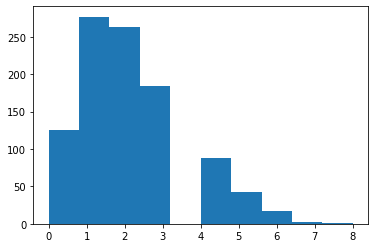

prob of no cars: 13.53%
prob of 3 or more cars: 32.33%
prob of at least 1 car: 86.47%


In [31]:
"""A bank found that the average number of cars waiting during the noon 
hour at a drive-up window follows a Poisson distribution with a mean 
of 2 cars. Make a chart of this distribution and answer these 
questions concerning the probability of cars waiting at the drive-up 
window."""

car_dist = stats.poisson.rvs(2, size=1000)
plt.hist(car_dist)
plt.show()

# What is the probability that no cars drive up in the noon hour?
print(f'prob of no cars: {round(stats.poisson(2).pmf(0)*100, 2)}%')


# What is the probability that 3 or more cars come through the 
# drive through?

print(f'prob of 3 or more cars: {round(stats.poisson(2).sf(2)*100,2)}%')

# How likely is it that the drive through gets at least 1 car?
print(f'prob of at least 1 car: {round(stats.poisson(2).sf(0)*100, 2)}%')

In [65]:

"""Grades of State University graduates are normally distributed with 
mean of 3.0 and a standard deviation of .3. Calculate the following:"""

# What grade point average is required to be in the top 5% of the 
# graduating class?

graduates = stats.norm(3, .3)
top_five_per = graduates.ppf(.95)
print(f'GPA for top 5%: {round(top_five_per, 2)}')

# What GPA constitutes the bottom 15% of the class?
bot_fifteen = graduates.ppf(.15)
print(f'GPA for bottom 15%: {round(bot_fifteen, 2)}')

# An eccentric alumnus left scholarship money for students in the 
# third decile from the bottom of their class. Determine the range of 
# the third decile. Would a student with a 2.8 grade point average 
# qualify for this scholarship?
print(graduates)

range_3rd_decile = graduates.ppf(.3) - graduates.ppf(.2)
print(range_3rd_decile)

# yes, a student with 2.8 gpa would qualify


# If I have a GPA of 3.5, what percentile am I in?

three_point_five = graduates.cdf(3.5)
print(f'gpa of 3.5 is top {round(three_point_five* 100, 2)}%')




GPA for top 5%: 3.49
GPA for bottom 15%: 2.69
0.0951662162594622
gpa of 3.5 is top 95.22%


86.52
97
0.14211867659283192


(array([8125.,    0.,    0., 1703.,    0.,    0.,  160.,    0.,    0.,
          12.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

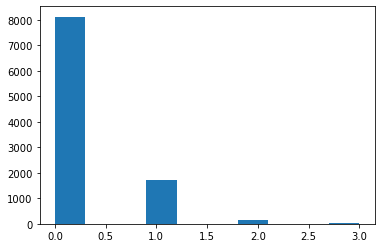

In [83]:
# A marketing website has an average click-through rate of 2%. One day 
# they observe 4326 visitors and 97 click-throughs. How likely is it 
# that this many people or more click through?

click_through_dist = stats.poisson.rvs(.2, size=10000)
click_thru = 97 
expected_click_thru = .02 * 4326
print(expected_click_thru)
print(click_thru)

print(stats.poisson(expected_click_thru).sf(click_thru-1))


plt.hist(click_through_dist)

In [84]:
"""You are working on some statistics homework consisting of 100 
questions where all of the answers are a probability rounded to the 
hundreths place. Looking to save time, you put down random 
probabilities as the answer to each question.
"""

# What is the probability that at least one of your first 60 answers  
# is correct?

stats.binom(60, .01).sf(0)


0.45284335760923855

In [90]:
"""The codeup staff tends to get upset when the student break area is 
not cleaned up. Suppose that there's a 3% chance that any one student 
cleans the break area when they visit it, and, on any given day, about 
90% of the 3 active cohorts of 22 students visit the break area. How 
likely is it that the break area gets cleaned up each day? How likely 
is it that it goes two days without getting cleaned up? All week?"""

def gets_cleaned(days, clean=True):

    students = .9*3*22
    visits = students * days
    if clean:
        return stats.binom(visits, .03).sf(.99)
    else:
        return stats.binom(visits, .03).cdf(.99)
    
    
print(gets_cleaned(1))
print(gets_cleaned(1, clean=False))
print(gets_cleaned(2, clean=False))
print(gets_cleaned(5, clean=False))




0.8362274861228872
0.16377251387711275
0.026821436301629083
0.00011781621791055166


In [95]:
"""You want to get lunch at La Panaderia, but notice that the line is 
usually very long at lunchtime. After several weeks of careful 
observation, you notice that the average number of people in line when 
your lunch break starts is normally distributed with a mean of 15 and 
standard deviation of 3. If it takes 2 minutes for each person to order,
and 10 minutes from ordering to getting your food, what is the 
likelihood that you have at least 15 minutes left to eat your food 
before you have to go back to class? Assume you have one hour for lunch,
and ignore travel time to and from La Panaderia."""

actual_time =35 
max_ppl = 35 // 2


print(f'at least 15 min to eat: {round(stats.norm(15, 3).cdf(17)*100, 2)}%')


at least 15 min to eat: 74.75%


In [123]:
"""Connect to the employees database and find the average salary of 
current employees, along with the standard deviation. For the 
following questions, calculate the answer based on modeling the 
employees salaries with a normal distribution defined by the 
calculated mean and standard deviation then compare this answer to the 
actual values present in the salaries dataset."""

def to_two(num):
    num = round(num,2)
    return num

# What percent of employees earn less than 60,000?
url = get_db_url('employees')
sql = """

SELECT salary
FROM salaries
WHERE to_date > NOW()

"""
salaries_data = pd.read_sql(sql, url)

average_salary = salaries_data.salary.mean()
std_dev = salaries_data.salary.std()
print(f'average salary: {to_two(average_salary)}')
print(f'std deviation: {to_two(std_dev)}')

print()
modeled_salaries = stats.norm(average_salary, std_dev)
print(f'modeled < 60000: {to_two(modeled_salaries.cdf(60000)*100)}%')
print(f'actual < 60000: {to_two((salaries_data.salary < 60000).mean()*100)}%')


# What percent of employees earn more than 95,000?
print()
print(f'modeled > 95000: {to_two(modeled_salaries.sf(95000)*100)}%')
print(f'actual > 95000: {to_two((salaries_data.salary > 95000).mean()*100)}%')

# What percent of employees earn between 65,000 and 80,000?
print()
print(f'modeled 65000 < n < 80000: {to_two(modeled_salaries.sf(65000) - modeled_salaries.sf(80000))*100}%')
print(f'actual 65000 < n < 80000: {to_two(((salaries_data.salary > 65000) & (salaries_data.salary < 80000)).mean()*100)}%')


# What do the top 5% of employees make?
print()
print(f'modeled top 5%: {to_two(modeled_salaries.ppf(.95))}')
print(f'actual top 5%: {to_two(salaries_data.salary.quantile(.95))}')

average salary: 72012.24
std deviation: 17310.0

modeled < 60000: 24.39%
actual < 60000: 27.06%

modeled > 95000: 9.21%
actual > 95000: 10.86%

modeled 65000 < n < 80000: 34.0%
actual 65000 < n < 80000: 32.51%

modeled top 5%: 100484.64
actual top 5%: 104225.85
